# Загрузка данных

In [105]:
import psycopg2
import requests
import json
import time
from psycopg2.extras import Json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
conn = psycopg2.connect("dbname=postgres user=postgres host=localhost port=5432 password=123456")

In [107]:
# внизу описание результата, для работы сделать новую коптю!

cur = conn.cursor()
cur.execute("select id, area, employer, name, salary_from, salary_to, currency from analyst_2;")
vacs = cur.fetchall()

In [108]:
an2 = pd.DataFrame(vacs)

In [109]:
an2.head()

,0,1,2,3,4,5,6
0,106904824,Москва,Альфа-Банк,Стажёр бизнес-аналитик,NaN,NaN,None
1,106910127,Москва,Robusta,Junior Analyst,NaN,NaN,None
2,106916597,Москва,Effective Mobile,Junior Data Analyst,NaN,NaN,None
3,106692739,Казань,Норматех,Бизнес-аналитик (стажер),60000.0,70000.0,RUR
4,105383904,Москва,OptiTeam,Аналитик Excel,NaN,NaN,None


In [110]:
# Rename columns
an2.rename(columns={0: 'id', 1: 'area', 2: 'employer', 3:'name', 4: 's_from', 5:'s_to', 6:'currency'}, inplace=True)
an2

,id,area,employer,name,s_from,s_to,currency
0,106904824,Москва,Альфа-Банк,Стажёр бизнес-аналитик,NaN,NaN,None
1,106910127,Москва,Robusta,Junior Analyst,NaN,NaN,None
2,106916597,Москва,Effective Mobile,Junior Data Analyst,NaN,NaN,None
3,106692739,Казань,Норматех,Бизнес-аналитик (стажер),60000.0,70000.0,RUR
4,105383904,Москва,OptiTeam,Аналитик Excel,NaN,NaN,None
...,...,...,...,...,...,...,...
937,105924183,Краснодар,Ракета,Аналитик 1С (УХ),NaN,NaN,None
938,105803837,Казань,Ракета,"Аналитик 1С (ERP, УТ) в IT-компании",NaN,NaN,None
939,104906884,Москва,АСАП РАЗРАБОТКА,"Ведущий консультант-аналитик 1С: ERP (закупки,...",NaN,NaN,None
940,106274183,Москва,ПУЛЬС АЙТИМ,Системный аналитик (1С),NaN,NaN,None


# Анализ

In [111]:
an2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        942 non-null    int64  
 1   area      942 non-null    object 
 2   employer  942 non-null    object 
 3   name      942 non-null    object 
 4   s_from    368 non-null    float64
 5   s_to      293 non-null    float64
 6   currency  418 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 51.6+ KB


In [112]:
an2.describe()

,id,s_from,s_to
count,9.420000e+02,368.000000,293.000000
mean,1.051747e+08,125595.108696,184297.703072
std,3.365902e+06,76051.169695,108635.791870
min,7.910147e+07,600.000000,800.000000
25%,1.055453e+08,70000.000000,100000.000000
50%,1.062420e+08,110000.000000,170000.000000
75%,1.067938e+08,180000.000000,250000.000000
max,1.069320e+08,390000.000000,550000.000000


In [113]:
an2.area.unique()

array(['Москва', 'Казань', 'Назрань', 'Санкт-Петербург', 'Пермь',
       'Ростов-на-Дону', 'Выкса', 'Астрахань', 'Ижевск', 'Новосибирск',
       'Эстония', 'Краснодар', 'Ярославль', 'Кипр', 'Сербия',
       'Екатеринбург', 'Иркутск', 'Томск', 'Омск', 'Волгоград',
       'Владимир', 'Кемерово', 'Калининград', 'Нижний Новгород', 'Самара',
       'Тверь', 'Уфа', 'Рязань', 'Саратов', 'Липецк', 'Чебоксары',
       'Набережные Челны', 'Красноярск', 'Элиста', 'Астана', 'Ташкент',
       'Владивосток', 'Саранск', 'Белгород', 'Грозный', 'Тольятти',
       'Курск', 'Армения', 'Барнаул', 'ОАЭ', 'Алматы', 'Тбилиси',
       'Артемовский (Свердловская область)', 'Хабаровск', 'Гомель',
       'Петрозаводск', 'США', 'Ульяновск', 'Минск', 'Челябинск',
       'Иваново (Ивановская область)', 'Тула', 'Воронеж', 'Гродно',
       'Брянск', 'Польша', 'Йошкар-Ола', 'Иннополис', 'Баку',
       'Симферополь', 'Сочи', 'Химки (Московская область)', 'Пенза',
       'Оренбург', 'Тюмень'], dtype=object)

In [114]:
an2.currency.value_counts()

currency
RUR    399
USD     15
EUR      2
BYR      1
KZT      1
Name: count, dtype: int64

Нужно преобразовать валюту или исключить признаки

In [115]:
# cur_df = an2.set_index('currency')

In [116]:
# cur_df.drop(['BYR', 'KZT'],axis = 0)

In [117]:
an2 = an2[(an2.currency != 'BYR') & (an2.currency != 'KZT')]

In [ ]:
# очищенные от валюты столбцы

In [118]:
an2.currency.value_counts()

currency
RUR    399
USD     15
EUR      2
Name: count, dtype: int64

In [119]:
df = an2.copy()

In [120]:
df

,id,area,employer,name,s_from,s_to,currency
0,106904824,Москва,Альфа-Банк,Стажёр бизнес-аналитик,NaN,NaN,None
1,106910127,Москва,Robusta,Junior Analyst,NaN,NaN,None
2,106916597,Москва,Effective Mobile,Junior Data Analyst,NaN,NaN,None
3,106692739,Казань,Норматех,Бизнес-аналитик (стажер),60000.0,70000.0,RUR
4,105383904,Москва,OptiTeam,Аналитик Excel,NaN,NaN,None
...,...,...,...,...,...,...,...
937,105924183,Краснодар,Ракета,Аналитик 1С (УХ),NaN,NaN,None
938,105803837,Казань,Ракета,"Аналитик 1С (ERP, УТ) в IT-компании",NaN,NaN,None
939,104906884,Москва,АСАП РАЗРАБОТКА,"Ведущий консультант-аналитик 1С: ERP (закупки,...",NaN,NaN,None
940,106274183,Москва,ПУЛЬС АЙТИМ,Системный аналитик (1С),NaN,NaN,None


In [121]:
rates = dict(RUR=1, USD=90, EUR=100)

In [127]:
df['from_'] = df.currency.map(rates) * df.s_from

In [128]:
df['to_'] = df.currency.map(rates) * df.s_to

In [129]:
df.describe()

,id,s_from,s_to,from_,to_
count,9.400000e+02,367.000000,292.000000,367.000000,292.000000
mean,1.051725e+08,125256.130790,184904.452055,131621.253406,195708.904110
std,3.369035e+06,75876.097299,108323.839038,73388.634530,104834.221231
min,7.910147e+07,600.000000,800.000000,10000.000000,25000.000000
25%,1.055435e+08,70000.000000,100000.000000,80000.000000,117500.000000
50%,1.062420e+08,110000.000000,170000.000000,120000.000000,180000.000000
75%,1.067940e+08,180000.000000,250000.000000,180000.000000,260000.000000
max,1.069320e+08,390000.000000,550000.000000,390000.000000,550000.000000


In [138]:
df[df['from_'] < df['from_'].quantile(0.1)]

,id,area,employer,name,s_from,s_to,currency,from_,to_
5,104461044,Назрань,Центр АЗы,Младший аналитик данных,10000.0,45000.0,RUR,10000.0,45000.0
10,106823355,Ростов-на-Дону,Первый Сми,Аналитик,20000.0,25000.0,RUR,20000.0,25000.0
36,105928669,Москва,Аналитическое агентство «Смыслография»,Аналитик СМИ и соцмедиа,40000.0,NaN,RUR,40000.0,NaN
43,106798286,Москва,Фендель Виктория Вячеславовна,Аналитик Wildberries (Power BI),50000.0,75000.0,RUR,50000.0,75000.0
45,106828336,Москва,RVISION,Аналитик,40000.0,50000.0,RUR,40000.0,50000.0
61,105812724,Москва,Data Heroes,Аналитик в IT-компанию,20000.0,40000.0,RUR,20000.0,40000.0
66,106082079,Москва,АКО,Аналитик видеонаблюдения,40000.0,56000.0,RUR,40000.0,56000.0
72,106260445,Санкт-Петербург,Брокер Недвижимости 1,Монтажер / аналитик вертикальных роликов Reels...,25000.0,60000.0,RUR,25000.0,60000.0
85,106892104,Санкт-Петербург,ITLand,Маркетолог-аналитик,30000.0,NaN,RUR,30000.0,NaN
121,106123566,Казань,Школа программирования для детей Code-Class,Бизнес-аналитик (удалённо),45000.0,50000.0,RUR,45000.0,50000.0


In [132]:
df[df['to_'] > df['to_'].quantile(0.99)]

,id,area,employer,name,s_from,s_to,currency,from_,to_
20,106831879,Ижевск,Хохряков Игорь,Senior системный аналитик,370000.0,550000.0,RUR,370000.0,550000.0
44,105875479,Москва,МФК ВЭББАНКИР,Старший системный аналитик / Senior Systems an...,350000.0,500000.0,RUR,350000.0,500000.0
206,101258419,Москва,Профи (profi.ru),Тимлид продуктовой аналитики кластера «Специал...,390000.0,490000.0,RUR,390000.0,490000.0


In [133]:
df.describe()

,id,s_from,s_to,from_,to_
count,9.400000e+02,367.000000,292.000000,367.000000,292.000000
mean,1.051725e+08,125256.130790,184904.452055,131621.253406,195708.904110
std,3.369035e+06,75876.097299,108323.839038,73388.634530,104834.221231
min,7.910147e+07,600.000000,800.000000,10000.000000,25000.000000
25%,1.055435e+08,70000.000000,100000.000000,80000.000000,117500.000000
50%,1.062420e+08,110000.000000,170000.000000,120000.000000,180000.000000
75%,1.067940e+08,180000.000000,250000.000000,180000.000000,260000.000000
max,1.069320e+08,390000.000000,550000.000000,390000.000000,550000.000000


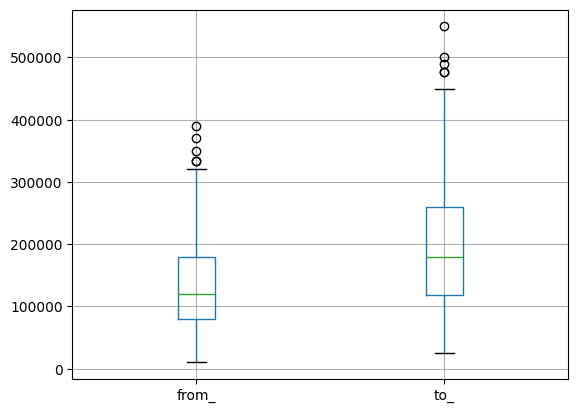

In [134]:
boxplot = df.boxplot(column=['from_', 'to_']) 

<Axes: >

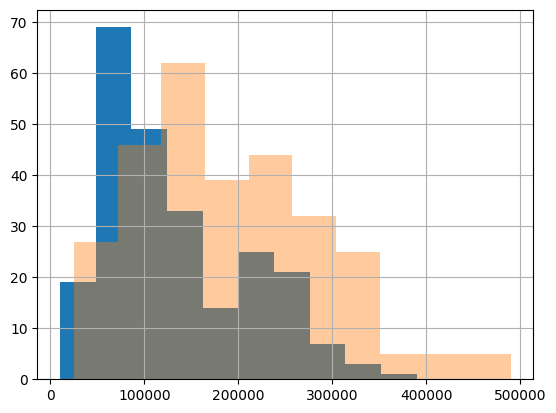

In [144]:
df_s = df.to_ < 500000
df[df_s].from_.hist()
df[df_s].to_.hist(alpha=0.4)

<Axes: >

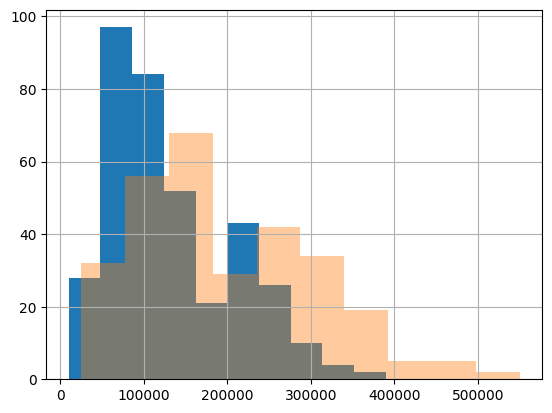

In [139]:
df.from_.hist()
df.to_.hist(alpha=0.4)

In [140]:
import scipy
import scipy.stats as stats
stats.shapiro(df.from_)

ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [141]:
# коэффициенты ассимметрии и эксцесса
skew = df.from_.skew()
kurt = df.from_.kurt()
print('Коэффициент ассиметрии:', skew)
print('Коэффициент эксцесса:', kurt)

Коэффициент ассиметрии: 0.8416248660978983
Коэффициент эксцесса: 0.21005565603053977


**Коэффициент асимметрии (0.84):**
Значение 0.84 указывает на довольно выраженную правостороннюю асимметрию. Это значит, что распределение скошено вправо, с длинным или тяжёлым хвостом на правой стороне. Среднее значение будет больше медианы.

**Коэффициент эксцесса (0.21):**
Положительный коэффициент эксцесса (0.21) указывает на то, что распределение немного острее по сравнению с нормальным распределением. Это распределение ближе к лептокуртическому, что означает большее количество экстремальных значений (выбросов) по сравнению с нормальным распределением.
Таким образом, распределение характеризуется заметной правосторонней асимметрией и слегка увеличенным числом экстремальных значений.

In [142]:
stats.shapiro(df.to_)

ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [143]:
# коэффициенты ассимметрии и эксцесса
skew = df.to_.skew()
kurt = df.to_.kurt()
print('Коэффициент ассиметрии:', skew)
print('Коэффициент эксцесса:', kurt)

Коэффициент ассиметрии: 0.5850404500636184
Коэффициент эксцесса: -0.09635378690898744


**Коэффициент асимметрии (0.59):**
Положительное значение асимметрии (0.59) указывает на умеренную правостороннюю асимметрию. Это означает, что распределение скошено вправо, и хвост распределения немного длиннее или тяжелее справа. Среднее значение будет больше медианы.

**Коэффициент эксцесса (-0.10):**
Отрицательный коэффициент эксцесса (-0.10) говорит о том, что распределение имеет немного более плоские хвосты, чем нормальное распределение, но это близко к нормальному. Такое распределение называется платикуртическим, и оно характеризуется меньшим числом экстремальных значений по сравнению с нормальным распределением.
Таким образом, распределение имеет умеренную правостороннюю асимметрию и слегка плоские хвосты.